# **Bloom Analysis - Herbs_Fls**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [3]:
# download the csv file
herbs_fls = "https://drive.usercontent.google.com/download?id=1Tnqv2NFP_eVk4FlKDutG8WiZChMb1IXJ&export=download&authuser=0&confirm=t&uuid=04222442-e4aa-4c45-a84c-4ebf2fa5bb69&at=APZUnTUE9_Q8Y1qB5MEE1PXu1o4e:1715038469023"
original_data = pd.read_csv(herbs_fls)

In [4]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df = df.rename(columns={'First_Yes_DOY':'DOY'})
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Crocus,spp.,2,Home,ME,2011,86
1,Crocus,spp.,2,Home,ME,2012,69
2,Crocus,spp.,2,Home,ME,2013,72
3,Crocus,spp.,2,Home,ME,2014,103
4,Crocus,spp.,2,Home,ME,2015,98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Genus      1902 non-null   object
 1   Species    1902 non-null   object
 2   Site_ID    1902 non-null   int64 
 3   Site_Name  1902 non-null   object
 4   State      1902 non-null   object
 5   Year       1902 non-null   int64 
 6   DOY        1902 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 104.1+ KB


## Unique Genera

56 unique genera:
['Crocus' 'Erythronium' 'Fragaria' 'Podophyllum' 'Caltha' 'Trillium'
 'Taraxacum' 'Arisaema' 'Mertensia' 'Claytonia' 'Hemerocallis'
 'Maianthemum' 'Euthamia' 'Sanguinaria' 'Scilla' 'Aquilegia' 'Echinacea'
 'Thalictrum' 'Asclepias' 'Clintonia' 'Cornus' 'Alliaria' 'Cirsium'
 'Medicago' 'Chamerion' 'Toxicodendron' 'Aruncus' 'Asarum' 'Baptisia'
 'Camassia' 'Epipactis' 'Liatris' 'Monarda' 'Penstemon' 'Phytolacca'
 'Polygonatum' 'Ratibida' 'Rudbeckia' 'Sisyrinchium' 'Tiarella'
 'Tradescantia' 'Viola' 'Geum' 'Achillea' 'Impatiens' 'Symphyotrichum'
 'Anemone' 'Cypripedium' 'Lysichiton' 'Trientalis' 'Actaea' 'Aralia'
 'Caulophyllum' 'Dicentra' 'Geranium' 'Uvularia']


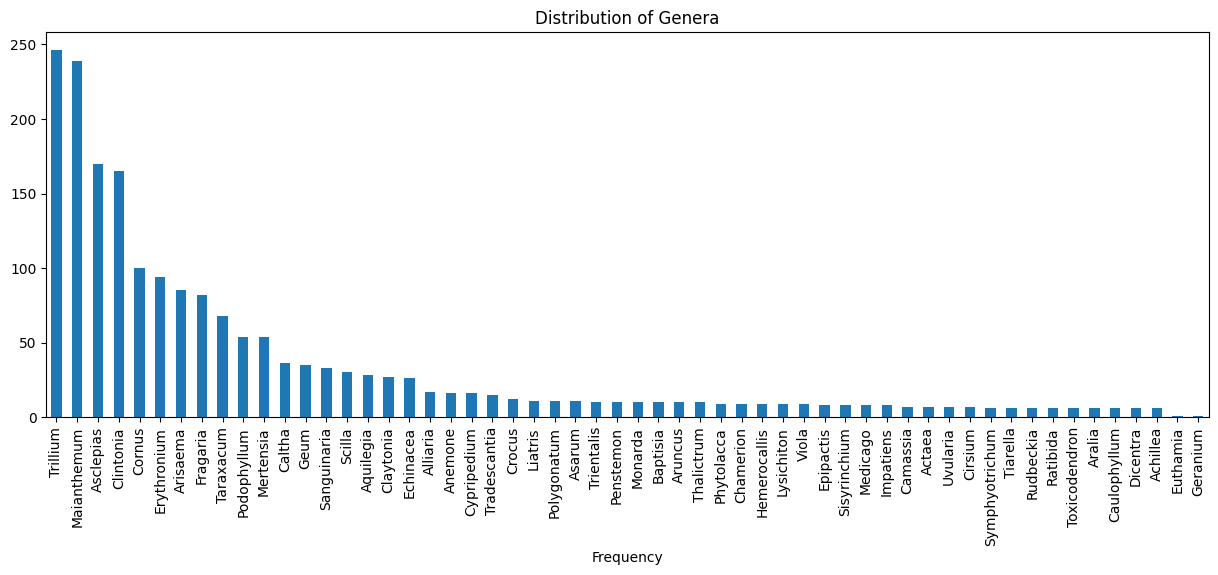

In [6]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

55 unique species:
['spp.' 'americanum' 'virginiana' 'peltatum' 'palustris' 'grandiflorum'
 'officinale' 'triphyllum' 'virginica' 'fulva' 'canadense' 'graminifolia'
 'canadensis' 'siberica' 'purpurea' 'thalictroides' 'syriaca' 'erectum'
 'borealis' 'tuberosa' 'petiolata' 'arvense' 'sativa' 'angustifolium'
 'radicans' 'undulatum' 'dioicus' 'incarnata' 'australis' 'quamash'
 'helleborine' 'spicata' 'didyma' 'digitalis' 'americana' 'biflorum'
 'pinnata' 'hirta' 'bellum' 'cordifolia' 'ohiensis' 'sororia' 'peckii'
 'millefolium' 'capensis' 'novae-angliae' 'acutiloba' 'acaule'
 'americanus' 'pachypoda' 'nudicaulis' 'cucullaria' 'maculatum'
 'racemosum' 'sessilifolia']


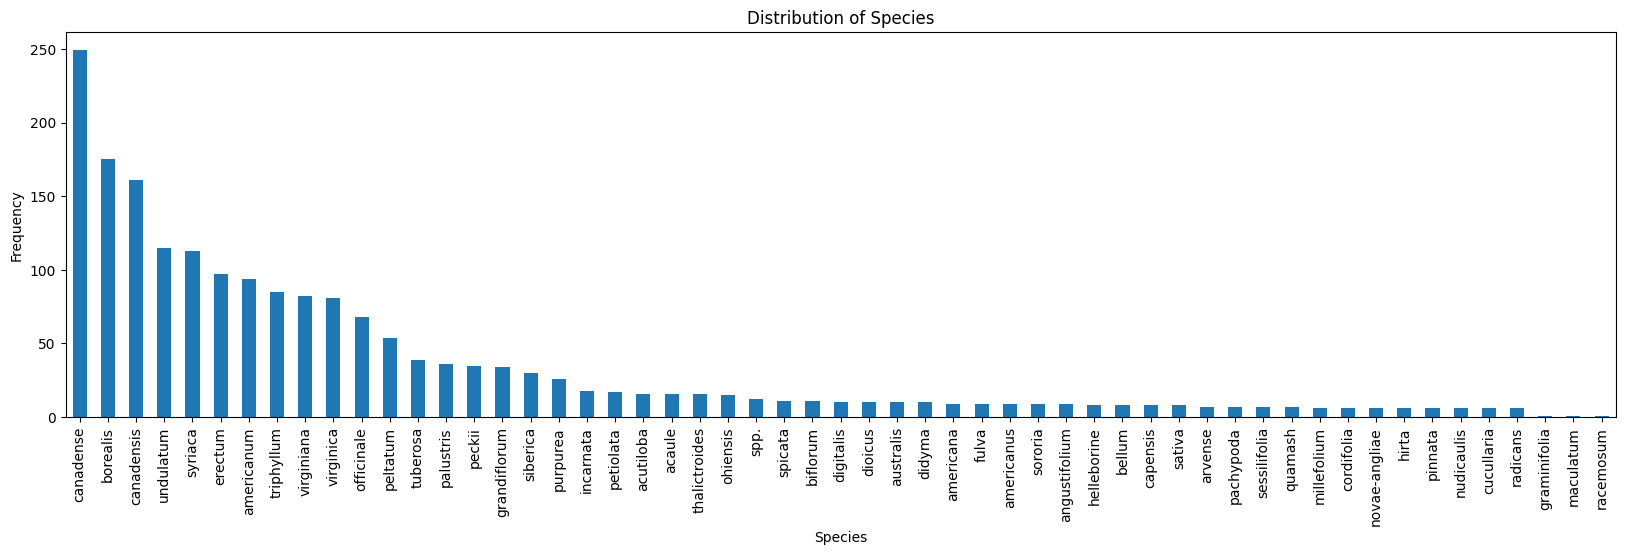

In [7]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

## Sites and States

In [8]:
state_counts = df['State'].value_counts().reset_index()
print('state_counts: \n',state_counts.sort_values('count', ascending=False).head().to_markdown(),'\n')
state_sites = df.groupby('State')['Site_Name'].nunique().reset_index()
print('state_sites: \n',state_sites.sort_values('Site_Name', ascending = False).head().to_markdown())

state_counts: 
 |    | State   |   count |
|---:|:--------|--------:|
|  0 | NH      |     665 |
|  1 | NY      |     360 |
|  2 | MN      |     242 |
|  3 | OH      |     227 |
|  4 | ME      |     171 | 

state_sites: 
 |    | State   |   Site_Name |
|---:|:--------|------------:|
| 12 | NH      |          40 |
| 13 | NY      |          15 |
|  9 | ME      |          11 |
| 11 | MN      |          10 |
|  7 | MA      |           4 |


In [9]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_sites['State'],
    z=state_sites['Site_Name'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Sites by State',
    geo_scope='usa'
)

fig.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['count'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Data Points by State',
    geo_scope='usa'
)

fig.show()

### List of All Sites by State

In [11]:
# print all site names by state
df.groupby('State')['Site_Name'].value_counts()

State  Site_Name                                           
AR     Backyard                                                  6
CT     Victory_Field                                            11
       Truants_Terrace                                          11
FL     Clearbrooke                                               6
GA     Powerline_ROW                                             6
IA     Overlook_Trail                                            6
IN     Home                                                      6
KY     my_back_yard                                             11
       my_front_yard                                            11
MA     back_yard                                                17
       home                                                     12
       First_Meadow                                              8
       Big_Meadow_North                                          6
MD     Ford_Mine_Trail                                          15
  

# Form groups based on unique combinations of genus, species, location

In [12]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [13]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Crocus,spp.,2,Home,ME,2011,86,"(Crocus, spp., Home, ME)"
1,Crocus,spp.,2,Home,ME,2012,69,"(Crocus, spp., Home, ME)"
2,Crocus,spp.,2,Home,ME,2013,72,"(Crocus, spp., Home, ME)"
3,Crocus,spp.,2,Home,ME,2014,103,"(Crocus, spp., Home, ME)"
4,Crocus,spp.,2,Home,ME,2015,98,"(Crocus, spp., Home, ME)"


In [14]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 227 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [15]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [16]:
# enter search criteria
genus = 'Crocus'
species = 'spp.'
site = 'Home'
state = 'ME'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Crocus,spp.,2,Home,ME,2011,86,"(Crocus, spp., Home, ME)"
1,Crocus,spp.,2,Home,ME,2012,69,"(Crocus, spp., Home, ME)"
2,Crocus,spp.,2,Home,ME,2013,72,"(Crocus, spp., Home, ME)"
3,Crocus,spp.,2,Home,ME,2014,103,"(Crocus, spp., Home, ME)"
4,Crocus,spp.,2,Home,ME,2015,98,"(Crocus, spp., Home, ME)"
5,Crocus,spp.,2,Home,ME,2016,69,"(Crocus, spp., Home, ME)"
6,Crocus,spp.,2,Home,ME,2017,64,"(Crocus, spp., Home, ME)"
7,Crocus,spp.,2,Home,ME,2019,90,"(Crocus, spp., Home, ME)"
8,Crocus,spp.,2,Home,ME,2020,69,"(Crocus, spp., Home, ME)"
9,Crocus,spp.,2,Home,ME,2021,68,"(Crocus, spp., Home, ME)"


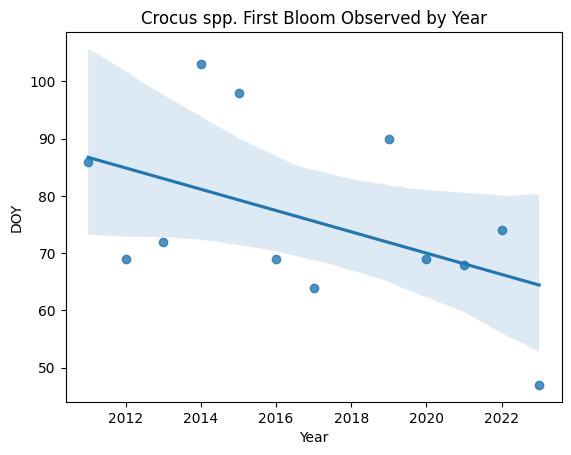

In [17]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [18]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

-0.479

# Perform regression and calculate relevant stats for all 224 unique groups

In [19]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'herbs_fls',
    'event' : 'bloom',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [20]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/herbs_fls_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

       dataset  event                                                                           grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0    herbs_fls  bloom                                                           (Crocus, spp., Home, ME)            12    -0.4790    -0.3567  -1.8586  0.2294   0.1089
1    herbs_fls  bloom                                                (Erythronium, americanum, Home, ME)            10    -0.3965    -0.2247   -0.586  0.1572   0.2179
2    herbs_fls  bloom                                                   (Fragaria, virginiana, Home, ME)            12    -0.1258    -0.3693  -0.2637  0.0158   0.6313
3    herbs_fls  bloom                                                  (Podophyllum, peltatum, Home, ME)            12    -0.5339    -0.4428  -1.7198  0.2851   0.0660
4    herbs_fls  bloom                                  (Caltha, palustris, Cedar_Bog_Lake_Lowland_2, MN)            11    -0.0474     0.0000  -0.1422  0.0022   0.845

In [21]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,221.0,8.579186,2.033654,3.0000,7.0000,9.0000,10.0000,18.0000
Pearson r,221.0,-0.108559,0.379593,-0.9519,-0.3965,-0.1122,0.1725,0.8798
Kendall τ,221.0,-0.093775,0.300666,-0.9661,-0.2928,-0.0899,0.1231,0.7857
R²,221.0,0.155223,0.185100,0.0001,0.0168,0.0719,0.2206,0.9061
p-value,221.0,0.483506,0.299233,0.0032,0.2025,0.4940,0.7353,0.9958


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [22]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

       dataset  event                                                 grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
212  herbs_fls  bloom                    (Aralia, nudicaulis, Phudd_Hill_, NY)             6    -0.9519    -0.9661 -3.4571  0.9061   0.0032
197  herbs_fls  bloom     (Cornus, canadensis, Lonesome_Lake_Hut_LONE2_5_, NH)             9    -0.8304    -0.6860 -2.0792  0.6895   0.0046
124  herbs_fls  bloom      (Maianthemum, canadense, Highland_Center_HIC3_, NH)             8     0.8798     0.7857  1.4958  0.7740   0.0050
144  herbs_fls  bloom      (Trillium, undulatum, Lonesome_Lake_Hut_LONE3_, NH)             8    -0.8030    -0.6183  -0.846  0.6448   0.0113
222  herbs_fls  bloom          (Erythronium, americanum, farm_-_near_pond, NY)             6    -0.9029    -0.8281 -2.8714  0.8152   0.0128
76   herbs_fls  bloom              (Claytonia, virginica, Ford_Mine_Trail, MD)             8    -0.8035    -0.5000 -3.6548  0.6457   0.0157
86   herbs_fls  bloo

### Descriptive Statistics of Instance with p-value < .05:

In [23]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,20.0,8.650000,1.725200,6.0000,8.000000,9.00000,9.250000,13.0000
Pearson r,20.0,-0.590995,0.482971,-0.9519,-0.804675,-0.71315,-0.664175,0.8798
Kendall τ,20.0,-0.470200,0.445040,-0.9661,-0.643275,-0.57860,-0.494275,0.7857
R²,20.0,0.570870,0.154233,0.3014,0.463300,0.54400,0.662275,0.9061
p-value,20.0,0.025695,0.013358,0.0032,0.014975,0.03060,0.033500,0.0473


###Significant Instances with Positive Slope:

In [24]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

       dataset  event                                              grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
124  herbs_fls  bloom   (Maianthemum, canadense, Highland_Center_HIC3_, NH)             8     0.8798     0.7857  1.4958  0.7740   0.0050
179  herbs_fls  bloom  (Asclepias, incarnata, Cary_Institute_Fern_Glen, NY)             9     0.7011     0.7432  1.1167  0.4915   0.0473


### Descriptive Statistics of Positively Sloped Instances:

In [25]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,2.0,8.50000,0.707107,8.0000,8.250000,8.50000,8.750000,9.0000
Pearson r,2.0,0.79045,0.126360,0.7011,0.745775,0.79045,0.835125,0.8798
Kendall τ,2.0,0.76445,0.030052,0.7432,0.753825,0.76445,0.775075,0.7857
R²,2.0,0.63275,0.199758,0.4915,0.562125,0.63275,0.703375,0.7740
p-value,2.0,0.02615,0.029911,0.0050,0.015575,0.02615,0.036725,0.0473


### Significant Instances with Negative Slope:

In [26]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

       dataset  event                                                 grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
58   herbs_fls  bloom                     (Taraxacum, officinale, my_yard, TX)             9    -0.6855    -0.5916  -9.926  0.4699   0.0411
76   herbs_fls  bloom              (Claytonia, virginica, Ford_Mine_Trail, MD)             8    -0.8035    -0.5000 -3.6548  0.6457   0.0157
212  herbs_fls  bloom                    (Aralia, nudicaulis, Phudd_Hill_, NY)             6    -0.9519    -0.9661 -3.4571  0.9061   0.0032
206  herbs_fls  bloom                (Asclepias, tuberosa, Overlook_Trail, IA)             6    -0.8418    -0.8281    -3.4  0.7086   0.0332
222  herbs_fls  bloom          (Erythronium, americanum, farm_-_near_pond, NY)             6    -0.9029    -0.8281 -2.8714  0.8152   0.0128
86   herbs_fls  bloom      (Asclepias, tuberosa, MG_Perennial_Demo_Garden, OH)             9    -0.7428    -0.5000  -2.679  0.5517   0.0194
27   herbs_fls  bloo

### Descriptive Statistics of Negatively Sloped Instances:

In [27]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,18.0,8.666667,1.814970,6.0000,8.000000,9.00000,9.750000,13.0000
Pearson r,18.0,-0.744489,0.101498,-0.9519,-0.807025,-0.73755,-0.670800,-0.5490
Kendall τ,18.0,-0.607383,0.148480,-0.9661,-0.644025,-0.58855,-0.511375,-0.3662
R²,18.0,0.563994,0.154074,0.3014,0.450100,0.54400,0.651325,0.9061
p-value,18.0,0.025644,0.012115,0.0032,0.016625,0.03060,0.033125,0.0411


### Positive/Negative Slope Count

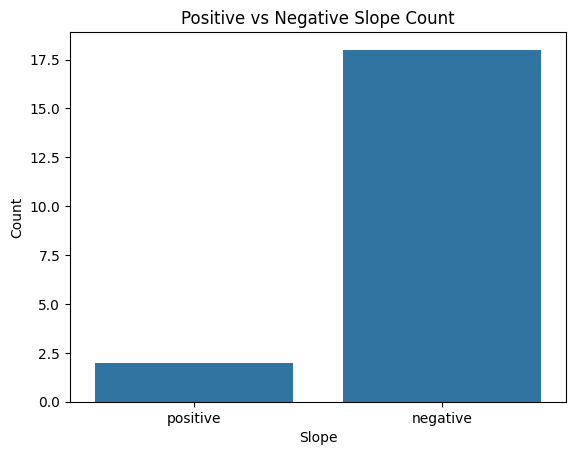

Number of positive slope examples: 2
Number of negative slope examples: 18


In [28]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 20, out of the original 227, groupings showed a statistically significant (p < .05) relationship between year and DOY
##2 have a positive slope
##18 have a negative slope